## Spectral and Socioeconomic Investigation of California Wildfires with Rasters, False Color Imagery and Socioeconomic Data
###### Author: Henry Oliver
###### Github Repository: https://github.com/ht-oliver/eds220-hwk4

##### **Purpose**
 The purpose of this walkthrough is to utilize false color satellite imagery, social demographic data, and geospatial methods to investigate the extent and effects of the Eaton and Palisades wildfires in California in January of 2025. First, in the 'False Color Imagery and Fire Extent' section this analysis will walk through the steps necessary to display Landsay 8 satellite imagery overlayed with estimated perimeters of the 2025 LA County Palisades and Eaton Fires. Afterwards, the 'Environmental Justice Investigation' will provide the steps necessary to spatially visualize social demographic information from the California Environmental Justice Index in an effort to analyze environmental justice impacts of the LA fires. Data sources are provided throughout this document.

##### **Background**
The Palisades and Eaton fires burned across parts of Los Angeles County, leaving visible scars on the landscape. Using Landsat satellite imagery, we can highlight burn areas, compare pre- and post-fire conditions, and better understand the extent and distribution of damage. Remote sensing provides an objective, large-scale view that complements on-the-ground assessments and helps support recovery planning and ecological monitoring. In explorations of the effects of these fires, it's important to take environmental justice factors into consideration. Environmental justice examines how environmental hazards and disasters impact different communities, particularly whether vulnerable or marginalized populations bear a disproportionate burden. By combining fire perimeter data with Census demographic and socio-economic information, we can assess whether certain income levels, racial groups, or other demographic characteristics were overrepresented in affected areas—critical information for equitable recovery planning and future risk mitigation.

##### **Highlights**
  - Wrangling and displaying `.shp ` and `.nc` file types
  - Producing True and False color imagery
  - Combining fire extent data with socio-economic data
  - Creating useful, intuitive, and accurate visualizations

# False Color Imagery and Fire Extent

### **Part 1: Installing libraries**
Performing the data download, manipulation, and displays in this analysis requires the installation of several publicly-available software packages.

In [94]:
import os                           # file and path handling
import pandas as pd                 # tabular data analysis
import matplotlib.pyplot as plt     # plotting and visualization
import xarray as xr                 # working with labeled multi-dimensional data (e.g., rasters)
import rioxarray as rio             # geospatial raster I/O and spatial operations
import netCDF4                      # reading NetCDF datasets
import geopandas as gpd             # vector geospatial data (shapefiles, geodataframes)
import numpy as np                  # numerical operations and arrays
import contextily as ctx            # Basemaps


### **Part 2: Fire Perimeter data**
Shapefiles for the outline of LA County fires are provided by LA County. This step contains a method to download, join, project, and display fire perimeter data. Make sure to carefully read comments for reasoning behind each code chunk.

Below are the data sources for each perimeter shapefile.

##### Eaton Fire
 - **File Name**: Eaton_Perimeter_20250121.shp
 - **Source**: https://egis-lacounty.hub.arcgis.com/datasets/
lacounty::palisades-and-eaton-dissolved-fire-perimeters-2025/explore?layer=0
 - **Publisher**: County of Los Angeles
 - **Date**: February 26, 2025

##### Palisades Fire
 - **File Name**: Palisades_Perimeter_20250121.shp
 - **Source**: https://egis-lacounty.hub.arcgis.com/datasets/lacounty::palisades-and-eaton-dissolved-fire-perimeters-2025/explore?layer=1&location=34.133066%2C-118.349606%2C9.60
 - **Publisher**: County of Los Angeles
 - **Date**: February 26, 2025

In [61]:
# Download Eaton shapefile
eaton = gpd.read_file(os.path.join('data',
                                   'Eaton_Perimeter_20250121',
                                   'Eaton_Perimeter_20250121.shp'))

# Download Palisades shapefile
palisades = gpd.read_file(os.path.join('data',
                                   'Palisades_Perimeter_20250121',
                                   'Palisades_Perimeter_20250121.shp'))


### **Part 2: Fire Perimeter Data Exploration**
Let's get a bit more familiar with our fire perimeter data. Eventually, we will want to join these two files into a single layer and plot them in combination with raster data for our final visualization. In order to do so we must first confirm that our shapefiles have the data we want to visualize, and are compatible with eachother.

First, let's check what our data frame looks like using the `head()` method, and check the data type of our Eaton shapefile using the `type()` function.

In [62]:
# Check data type of `eaton`
print(f"Eaton shapefile data type is: {type(eaton)}")
# Visualize data frame
eaton.head()

Eaton shapefile data type is: <class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


Now let's do the same thing for our Palisade shapefile

In [63]:
# Check data type of `palisades`
print(f"Palisade shapefile data type is: {type(palisades)}")
# Visualize data frame
palisades.head()

Palisade shapefile data type is: <class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


Now lets take a look at our plots, separately, using the `.plot()` method.

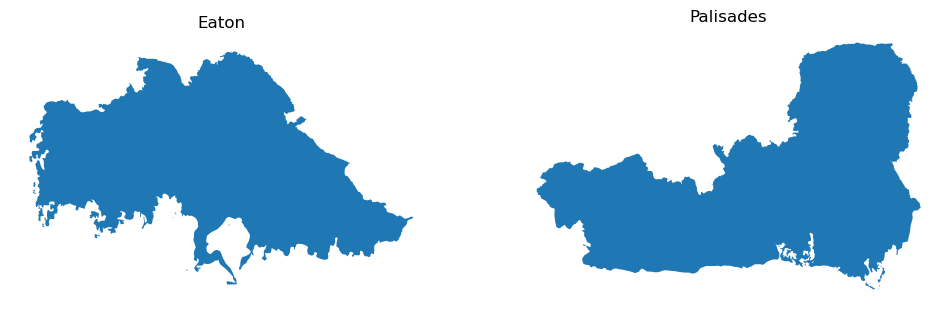

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
eaton.plot(ax=ax1)  # Plot Eaton
ax1.set_title('Eaton')  # Add title
ax1.axis('off')
palisades.plot(ax=ax2)  # Plot palisades in second column
ax2.set_title('Palisades')  # Add title
ax2.axis('off'); # ';' suppresses output of bounds

#### What did we learn?
The `type()` method showed us that both `palisades` and `eaton` are classified as `geopandas.geodatafame.GeoDataFrame`. This tells us that they're special types of dataframes designed for working with maps and geographic data, not just regular numbers and text

The `head()` method shows us the first 5 rows in our geodataframe. This shows us that our shapefile is comprised of multiple polygons, and we're only dealing with 5 data columns.

Our '.plot()' shows us the general shape of each fire. This will be important when we make labels for our combined map later.

#### CRS and Projection
Next, we want to confirm that we'll be able to use these shapefiles in the same plot. In order to do so, our Geodataframes must share a Coordinate Reference System (CRS). A CRS defines how spatial data like shapefiles and rasters are projected onto the Earth’s surface, ensuring that their locations align correctly when plotted with GIS systems. We will check our CRS with the `.crs` attribute. Then we'll check if the CRS is projected or geographic. A projected CRS flattens the curved surface of the Earth onto a 2D map using a specific mathematical projection, while a geographic CRS describes locations directly with latitude and longitude on a spherical or ellipsoidal Earth.

In [65]:
# Check CRS
print(f"Eaton CRS is: {eaton.crs}")
print(f"Palisades CRS is: {palisades.crs}")
assert eaton.crs == palisades.crs # Returns error if CRS don't match

# Check if projected
print(f"Eaton CRS is projected. {eaton.crs.is_projected}")
print(f"Palisades CRS is projected. {palisades.crs.is_projected}")
assert (eaton.crs.is_projected and palisades.crs.is_projected) == True # Returns error if not projected

Eaton CRS is: EPSG:3857
Palisades CRS is: EPSG:3857
Eaton CRS is projected. True
Palisades CRS is projected. True


Looks like our data have the same CRS and are both projected. Now we can combine them with the `pd.concat()`, and then put them on a simple plot.

[]

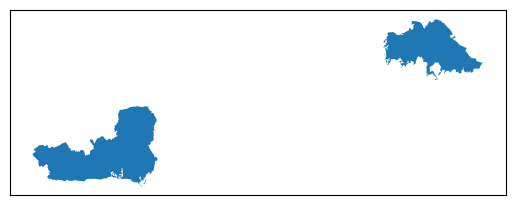

In [93]:
# Combine eaton and palisades shapefiles
fires = gpd.GeoDataFrame(pd.concat([eaton, palisades]))

# Confirm successful combination by plotting
ax = fires.plot()

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])


### **Part 3: NetCDF data import and exploration**
Next, we want to plot these perimeters on top of a raster showing false-color imagery. In order to do that, we'll need to make some slight modifications to our landsat data. Our Landsat 8 data is in NetCDF format (.nc), as opposed to our fire perimeters which were shapefiles (.shp). We'll have to take specific steps to read it in correctly and specify our CRS.

Below is the data source for Landsat 8 imagery
##### **Landsat 8 Imagery of LA County**
 - **File Name**: 'landsat8-2025-02-23-palisades-eaton.nc'
 - **Source**: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2
 - **Publisher**: Microsoft Planetary Computer
 - **Date**: February 26, 2025


 To read in our data we will first create filepath, then use a tool from the `xarray` package, `xr.open_dataset` to read it.

In [67]:
# Create filepath
path = ('data/landsat8-2025-02-23-palisades-eaton.nc')

# Read in landsat netCDF4 data package with xarray
landsat = xr.open_dataset(path)

Next, we'll find out what kind of data we're working with with the same `type()` method from before, and calling our data. Then we'll check if a CRS is assigned using the `.rio.crs` attribute.

In [68]:
# Print data type
print(f"landsat data type is: {type(landsat)}")

# Call data to view bands, dimensions & coordinates
landsat

# Once the data is displayed below, click the page icon on the x or y coordinate to view the CRS and resolution
# Now let's check if this CRS is assigned
# Print CRS of landsat data
print(landsat.rio.crs)

landsat data type is: <class 'xarray.core.dataset.Dataset'>
None


#### **What did we learn?**

We found our that our landsat data is a `xarray` dataset, which is a essentially a multi-dimensional set of arrays. By printing `landsat` we were able to access the number of bands, the dimensions, and the CRS for x and y coordinate. We're also able to tell that this data has 5 spectral bands including: red, green, nir08, and swir22.

**Click the page icon by the x coordinate on this list to view attributes for the coordinate system. This should tell us the CRS.**

 The CRS for the x and y coordinates is EPSG:32611, and it is projected.  Finally also able to see that the units of the CRS are meters, and the resolution is 30x30 meters. Unfortunately, our CRS is not assigned, we just know that our coordinates use EPSG:32611. Next, we'll need to assign a CRS to our `landsat` object.

### **Part 4: Restoring geospatial information**

Right now, our Landsat ratio does not have an assigned CRS, though it does have a reference CRS. We need to fix that so our data can be displayed with our fire perimeters. We'll assign our refernece CRS using the `.rio.write_crs()` method.

In [69]:
# Write CRS to WGS 84 / UTM zone 11N or 'EPSG:32611'
# inplace=True overwrites our landsat object to assign CRS
landsat.rio.write_crs(["EPSG", "32611"], inplace=True)

# Print to confirm it worked. This should return 'EPSG:32611'
print(landsat.rio.crs)

EPSG:32611


### **Part 5: True color image**

Our `landsat` data contains 6 raster layers with information. Eventually we want to view a 'False Color' Image of fire location, but first we'll take a look at the 'True Color' image. True Color images display the 'red', 'blue' and 'green' light as detected by the satellite, which is similar to the way the image would be interpreted by our eyes. In order to display this information, we'll have to specify which pieces of the data we want to plot, and how we want to plot it. We'll also have to deal with any NA values that might be present in any of the bands. This will give us a `RuntimeWarning` that we don't have to worry about, so we'll ignore it. The code chunk below accomplishes the following:
        1) Sets any NA values to 0
        2) Plot 'red', 'green' and 'blue' bands
        3) Converts data to array
- When we plot 3 bands, we get a dataset with 3 variables, rather than a single array. Our plot function `.plot.imshow()` is expecting one single 3D array. Converting to array wit the `.to_array` function combines our 3 variables into a single array.

        4) Eliminates extreme pixel values
- The `robust = True` argument in the `plot.imshow()` method ignores the top and bottom 0.5-1% of pixel values so that our color scaling isn't influenced by extreme outliers.

        5) Plot image

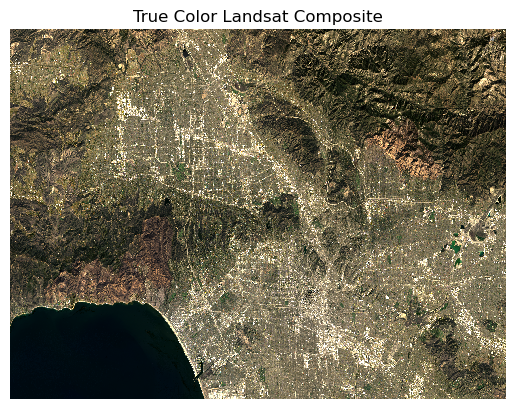

In [ ]:
import warnings # Ignore warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) # Ignore runtime warning

# Replace any NA values with 0
landsat.fillna(0);

ax = (
    landsat[['red', 'green', 'blue']] # Select bands
    .to_array() # Convert to 3D array
    .plot # Plot image
    .imshow(robust=True) # Eliminate outlier pixel values
); # ';' hides output

ax.axes.axis('off'); # Turn axis off
ax.axes.set_title("True Color Landsat Composite"); # Set title

### **Step 6: False color image**

'False color' images display short-wave infrared, near-infrared, and red light as detected by the satellite. While these images are less accurate to our visual interpretation of a landscape, they help highlight certain difficult-to-see characteristics of a landscape.

Without creating any new variables, let's create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order) with the same commands we used to create our true color imagery.

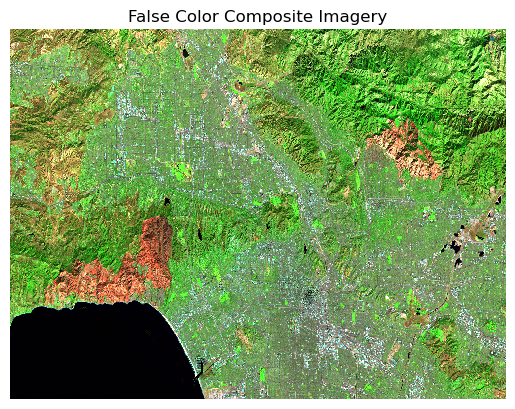

In [87]:
# Display false color image
ax = landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)
ax.axes.axis('off')
ax.axes.set_title('False Color Composite Imagery');

### **Step 7: Map**
Now we can put it all together, and plot our fire perimeters shapefile on top of our false color imagery. In order to do so, we'll need to make sure that our imagery and perimeters share a CRS. We'll assign our `fires` dataset to our `landsat` CRS using the `to_crs()` function.

In [19]:
# Make sure our fires and imagery have the same CRS
fires = fires.to_crs(landsat.rio.crs)
assert(fires.crs == landsat.rio.crs)


Now we can plot our data. We'll start by setting up our plot and axes, then we'll plot our data in layers. First, we'll plot our false color imagery using our method from above. Then we'll plot our fire perimeter. Finally, we'll add data labels, captions and image credits. There are lots of small specifications we'll need to make for our map to show up in a visually pleasing a useful way. Read comments for more details on unfamiliar syntax.

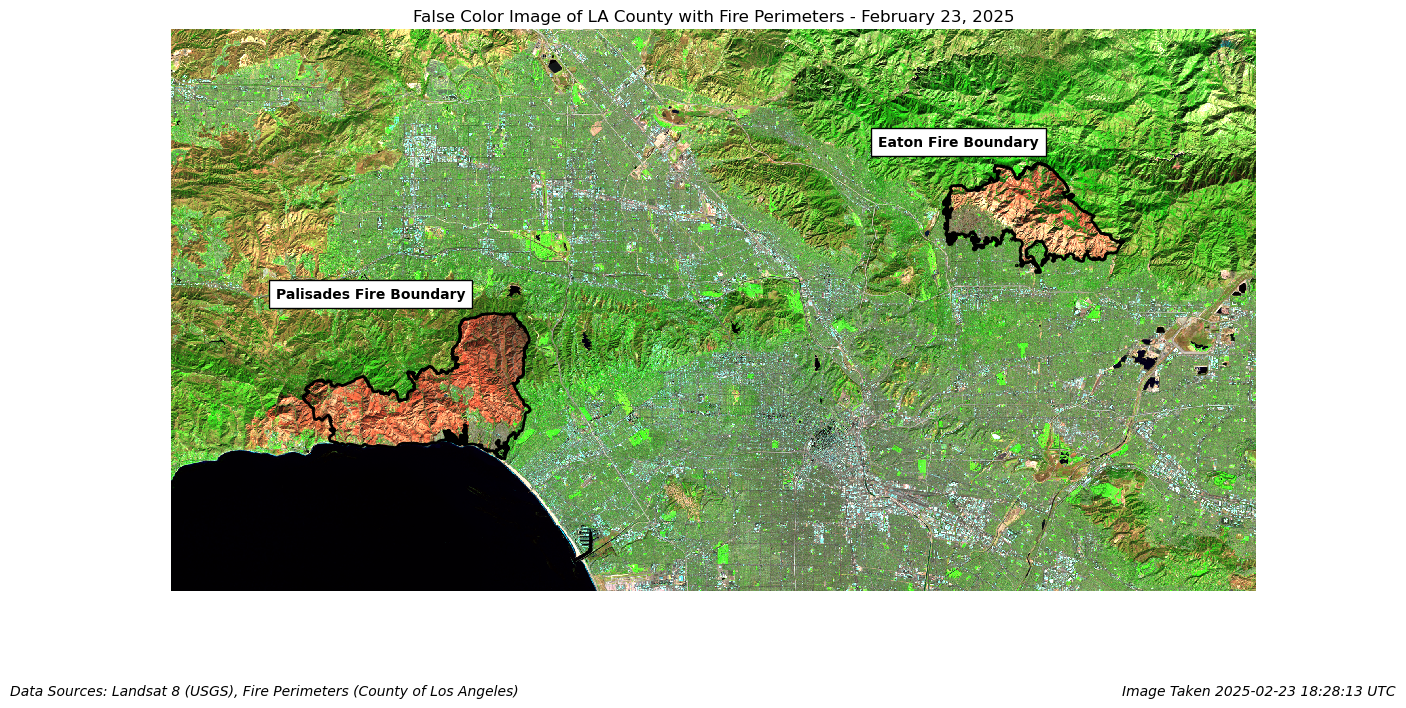

In [20]:
# Create plot
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Plot LANDSAT false color imagery
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow( # Select false color bands
    robust=True,
    ax=ax,
    add_colorbar = False,
    zorder = 0) # Specify this is the borrom layer of our plot
# Add title
ax.set_title("False Color Image of LA County with Fire Perimeters - February 23, 2025")

# Plot fire perimeters
fires.plot(
    ax=ax,
    edgecolor='black', # Specify border color of fire perimeters
    facecolor= "none", # Specify fill color of perimeters
    linewidth=2, # Specify border thicness
    alpha= 1,
    zorder=1 # Specify plot to be on TOP of satellite imagery
)
# Remove map axis
ax.axis('off')

# Add Map data labels
plt.figtext(x=.63, y=.70, s="Eaton Fire Boundary", weight='bold',
            bbox = {'facecolor': 'white', #Add text border
                    'pad':5})
plt.figtext(x=.2,  y=.51, s="Palisades Fire Boundary", weight='bold',
            bbox = {'facecolor': 'white', #Add text border
                    'pad':5})

# Add Data Citation
fig.text(
    0.01, 0.01, 
    "Data Sources: Landsat 8 (USGS), Fire Perimeters (County of Los Angeles)", 
    fontsize=10,
    ha='left', 
    va='bottom',
    style = 'italic'
)

# Add Timestamp
fig.text(
    1, 0.01, 
    "Image Taken 2025-02-23 18:28:13 UTC", 
    fontsize=10,
    ha='right', 
    va='bottom',
    style = 'italic'
)
plt.show()

#### Interpretation:

The figure shows false-color Landsat imagery of Los Angeles County, with the Palisades and Eaton fire perimeters outlined in black. In this image, blue and green light are substituted with reading for short-wave (SWIR) and near-infrared (NIR) light respectively. As a result, healthy vegetation appears in shades of green (healthy vegetation has relatively high reflectence of NIR), bare ground or urban areas appear in gray to brown, and the areas affected by fire stand out in red (low NIR reflections, high SWIR), highlighting burned vegetation. By overlaying the fire perimeters, we can clearly see how the fire boundaries correspond to the affected areas, providing a visual confirmation of the fire extent.

# Environmental Justice Investigation

### **Part 8: Environmental Justice Data Import and Exploration**

Next, we'll import our Environmental Justice/Socioeconomic data. Below is information on the data source.

California Environmental Justice Index (EJI)
- **File Name**: EJI_2024_California.gdb
- **Source**: https://calenviroscreen-oehha.hub.arcgis.com/documents/c1b480ac4b564f26a7d8c5582cab8b60/about
- **Publisher**: California Environmental Protection Agency
- **Date**: 2023


In this next step, we'll create file path for our EJI data, and read in the data with the `gpd.read_file()` method. Then, we'll find our data type with the `type()` method and our CRS with the `.crs` attribute. Notice extra syntax like `__name__` and `.to_string()` that are used to give us cleaner outputs.

In [27]:
# Import CA EJI gdb
fp = os.path.join("data", "EJI_2024_California", "EJI_2024_California.gdb")
eji_california = gpd.read_file(fp)

# Determine datatype
print(f"EJI datatype is: {type(eji_california).__name__}")

# Determine CRS
print(f"EJI CRS is: {eji_california.crs.to_string()}")

# View our dataframe
eji_california.head()

EJI datatype is: GeoDataFrame
EJI CRS is: ESRI:102003


,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,11620,06,077,005127,140000US06077005127,06077005127,06077005127,San Joaquin County,California,CA,...,408.0,5.4,0.0,0.0,0.0,-999,-999,5909.703135,1.962577e+06,"MULTIPOLYGON (((-2178538.439 328974.247, -2178..."
1,11557,06,077,003406,140000US06077003406,06077003406,06077003406,San Joaquin County,California,CA,...,203.0,5.4,0.0,0.0,0.0,-999,-999,3805.322542,8.541741e+05,"MULTIPOLYGON (((-2174646.947 350500.600, -2174..."
2,11594,06,077,004402,140000US06077004402,06077004402,06077004402,San Joaquin County,California,CA,...,132.0,2.2,0.0,0.0,0.0,-999,-999,8576.416378,4.345421e+06,"MULTIPOLYGON (((-2169306.156 358323.611, -2169..."
3,11617,06,077,005124,140000US06077005124,06077005124,06077005124,San Joaquin County,California,CA,...,161.0,4.8,0.0,0.0,0.0,-999,-999,4842.265671,1.085207e+06,"MULTIPOLYGON (((-2174819.146 325432.172, -2174..."
4,11509,06,077,001700,140000US06077001700,06077001700,06077001700,San Joaquin County,California,CA,...,160.0,3.8,0.0,0.0,0.0,-999,-999,5087.384776,1.686400e+06,"MULTIPOLYGON (((-2172633.856 343802.277, -2172..."


#### **What did we learn**

Now we know that our  EJI data is a `pandas.geodataframe.GeoDataFrame`, similar to our fire perimeter data. We also know that our CRS is projected, and is 'ESRI:102003'. This is not the same CRS as our fire perimeter data, we'll have to fix that before we can use these datasets together.

### **Part 9: Matching CRS of Fire Perimeter and EJI Data**

For our analysis, we will want to combine our fire perimeter data with our EJI data. For this analysis, we're eventually going to want to plot our fires areas side by side to issue comparisons. For this reason, we'll be using the individual Eaton and Palisade fire boundaries, rather than the combined boundary that we used above. The first step will be to match our EJI CRS to our `eaton` CRS using the `to_crs()` method.

In [96]:
# Match CRS, overwrite with inplace = True
eji_california.to_crs(eaton.crs, inplace = True)

assert eji_california.crs == eaton.crs

### **Part 10: Joining EJI data to fire perimeter data**

If we want to view the distribution of socioeconomic variables within our fire perimeter, we'll need to join our two datasets together. We'll do this using the `gpd.join()` method. Within `gpd.join()` we'll use `intersects` in our `predicate` argument. The `predicate` argument species how the join will take place. `intersects` specifies that we'll select every census tract in our EJI data that touches the our fire perimeter. Then we'll make an exploratory plot to see if it worked

[]

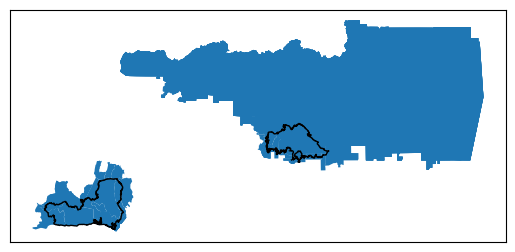

In [97]:
# Join EJI with palisades perimeter 
eji_palisades = gpd.sjoin(eji_california, palisades, predicate = 'intersects')

# Join EJI with eaton perimeter
eji_eaton = gpd.sjoin(eji_california, eaton, predicate = 'intersects')

# Create exploratory map to see how our join performed
fig, ax = plt.subplots() # Create axes
eji_palisades.plot(ax=ax) # Plot palisades
eji_eaton.plot(ax=ax) # Plot eaton

palisades.plot(ax = ax,
               color = 'none', 
               edgecolor = 'black') # Specify black outline

eaton.plot(ax = ax,
               color = 'none',
               edgecolor = 'black')

ax.set_xticks([])
ax.set_yticks([])

Notice that our fire outline is remarkably smaller than our census tract data. That's because we're seeing every census tract that intersects with our fire perimeter, no matter how large. For our visualizations, we'll only want to see census tract area that's within our fire perimeters. The next step will walk us through how we can do that.


### **Part 11: Clip EJI Data to Fire Perimeters**

Let's clip our census tracts to our fire perimeters using the `gdp.clip()` method. Our two arguments will be the two datasets. Our first argument will be the dataset we want to clip, the second, the dataset that we would like to clip to.

[]

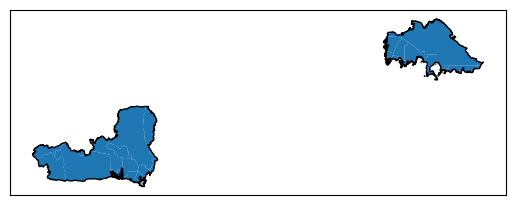

In [106]:
fig, ax = plt.subplots()  # Define axes

eji_palisades_clipped.plot(ax=ax)  # Plot Palisades EJI data
palisades.plot(ax=ax, color='none', edgecolor='black')  # Palisades fire perimeter

eji_eaton_clipped.plot(ax=ax)  # Plot Eaton EJI data
eaton.plot(ax=ax, color='none', edgecolor='black')  # Eaton fire perimeter

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])


Looks like we have a perfect fit. It should be noted here that using `intersects` is useful for finding data overlap, but when we're worried about the precise extent of our data, like we with a wildfire perimeter, we want to `clip()` our data to the desire shape.

## **Part 12: EJI Data - Choosing Variables for Analysis and Plotting**

We want to investigate if certain communities were disproportionately affected by the Palisades and Eaton fires. This could bring insight to the way in which the social landscape of Southern California victimizes certain groups. In order to do this, we're going to look at the effect of the fires on the population that is 200% below the federal poverty level. We focus on residents below 200% of the federal poverty level because lower-income communities are often more vulnerable to the impacts of wildfires (Stanford Wood Institute for the Environment, 2025).

In our EJI dataset, the 200% below poverty information is located in a column titled `EPL_POV200`. The following code chunk demonstrates how to isolate that variable, and plot it's values on a consistent color-scale within each census tract in each fire perimeter.



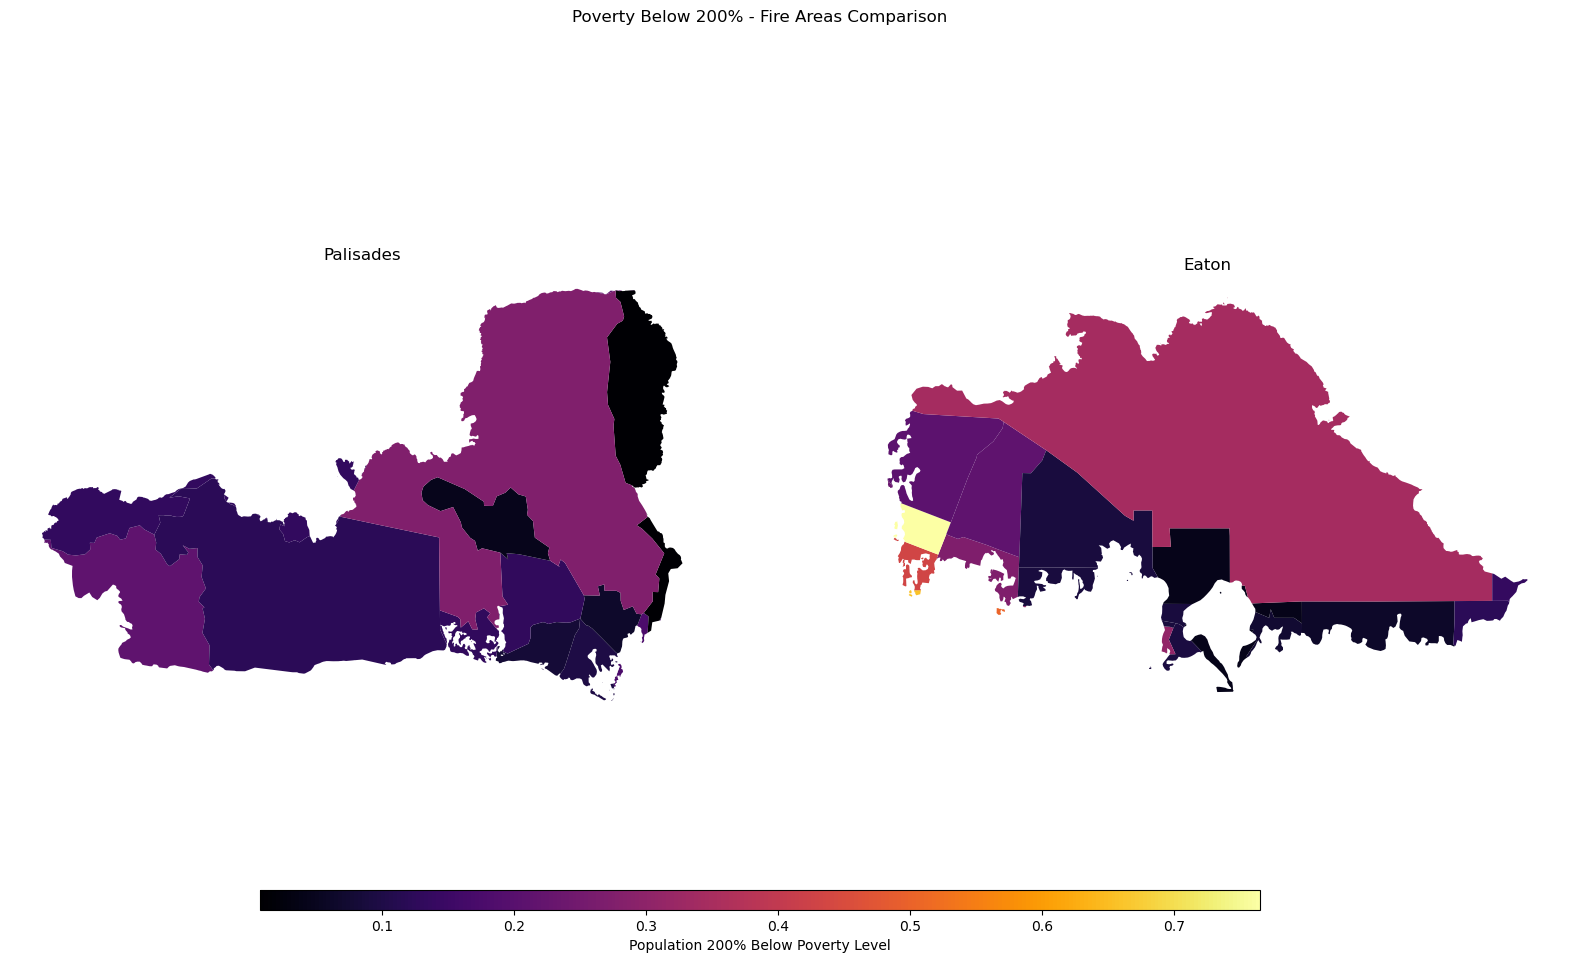

In [ ]:
# Set up axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Isolate EJI variable name
eji_variable = 'EPL_POV200'

# Find common min/max for legend range
vmin = min(eji_palisades_clipped[eji_variable].min(), eji_eaton_clipped[eji_variable].min())
vmax = max(eji_palisades_clipped[eji_variable].max(), eji_eaton_clipped[eji_variable].max())

# Plot census tracts within Palisades perimeter
eji_palisades_clipped.plot(
    column= eji_variable, # Select which variable to plot
    vmin=vmin, vmax=vmax, # Set legend range
    legend=False, # Eliminate individual legend, these will have a shared legend.
    ax=ax1, # Plot left
    cmap = 'inferno'
)
ax1.set_title('Palisades')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eji_eaton_clipped.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False, 
    ax=ax2,
    cmap = 'inferno'
)
ax2.set_title('Eaton')
ax2.axis('off')

# Add overall title
fig.suptitle('Poverty Below 200% - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap = 'inferno')
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Population 200% Below Poverty Level')

plt.show()

## Interpretation and Conclusions

The maps indicate that the Eaton fire impacted areas with a higher proportion of residents living below 200% of the federal poverty level, particularly in the western part of the Eaton fire perimeter. In contrast, the Palisades fire affected communities with relatively lower poverty rates. This suggests that lower-income populations were more concentrated in the Eaton fire zone, highlighting potential socioeconomic disparities in wildfire exposure and vulnerability.

Geospatial tools, combined with social and remotely sensed data, allow us to uncover patterns in both our landscapes and our society. By identifying where environmental hazards intersect with vulnerable populations, these methods provide a crucial first step toward addressing national and global environmental and humanitarian challenges. Geospatial analyses like this help us see the problems clearly and guide informed action. It's my hope that these tools become more available and accessible to future generations.

#### References:

County of Los Angeles. (2025). Eaton fire perimeter (Version 2025-02-21) [Shapefile]. Los Angeles County GIS Hub. https://egis-lacounty.hub.arcgis.com/datasets/lacounty::palisades-and-eaton-dissolved-fire-perimeters-2025/explore?layer=0

County of Los Angeles. (2025). Palisades fire perimeter (Version 2025-02-21) [Shapefile]. Los Angeles County GIS Hub. https://egis-lacounty.hub.arcgis.com/datasets/lacounty::palisades-and-eaton-dissolved-fire-perimeters-2025/explore?layer=1&location=34.133066%2C-118.349606%2C9.60

Microsoft Planetary Computer. (2025). Landsat 8 imagery of Los Angeles County (February 23, 2025) [NetCDF]. https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2

Stanford Woods Institute for the Environment. (2025, January 9). Social and economic disparities impact wildfire protection. Stanford University. https://woods.stanford.edu/news/social-and-economic-disparities-impact-wildfire-protection